In [4]:
%matplotlib inline

In [21]:
from matplotlib.pyplot import plot
import numpy as np

### Uniswap V2 constant product liquidity pool


All transactions are performed such that $x \cdot y = k$ invariant stays true after each trade.

Let $x$ be the RKL token.

We are interested in what happens to $\frac{y}{x} = \frac{k}{x^2}$ (i.e. price of RKL token in terms of $y$) after agents sell into the pool.

What happens when someone sells $\lambda \in [0, 1]$ tokens into this pool. $\lambda \cdot 100$ denotes percentage points of the RKL token in the pool, sold. So, if there are $1000$ RKL tokens in the pool, and $\lambda$ is $0.5$, it means $500$ RKL tokens are sold into the pool, making the new total of RKL tokens in the pool increase to $1500$.

What happens to the price of the RKL token as we vary the number of RKL tokens sold into the pool?

Initially, the price is $\frac{k}{x^2}$. Number of RKL tokens after the sale grows to $x \cdot (1 + \lambda)$, the amount of the counter party token changes to $\frac{k}{x \cdot (1 + \lambda)}$ such that we keep the invariant constant. We now have a lower RKL token price, namely $\frac{k}{x^2 \cdot (1 + \lambda)^2} < \frac{k}{x^2}$. The new price is $\displaystyle{1 - \frac{1}{(1 + \lambda)^2}}$ lower than the original.


In [1]:
def price_pct_change(pct_to_sell: float) -> float:
  # `pct_to_sell` in `[0, 1]`. If there are 1000 RKL tokens in the pool,
  # then `pct_to_sell` of `0.1` means someone holds 100 RKL tokens
  # outside of the pool that they wish to sell into the pool.
  return (1 - 1 / ((1 + pct_to_sell) ** 2))

In [17]:
pct_to_sale = np.arange(0.0, 1.0, 0.01)
price_change = [price_pct_change(x) for x in pct_to_sale]

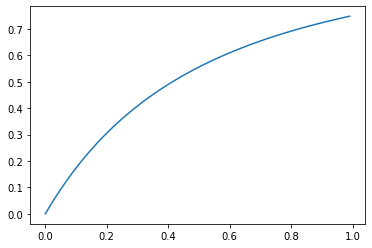

In [23]:
p = plot(pct_to_sale, price_change)